# DATA ENGINEERING PROJECT TEAM 12

In [ ]:
TWEETS SENTIMENT ANALYSIS USING DATA ENGINEERING PIPEPLINE

## DATA INGESTION STAGE

We use a twitter scrapper to scrape data from twitter.


In [59]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brighttenkorangofori/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [87]:
from apscheduler.schedulers.blocking import BlockingScheduler
from datetime import datetime, timedelta
import json
import sqlite3
import pandas as pd

import numpy as np

import re
import sys

from textblob import TextBlob as tb

import matplotlib.pyplot as plt
import seaborn as sns

import warnings as w
w.filterwarnings("ignore", category=DeprecationWarning)

from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.naive_bayes import MultinomialNB


%load_ext autoreload
%autoreload 2
%matplotlib inline



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
def search_tweet(user,mode,number):
  """
    this function takes twitter user, mode -> Eg hashtag, and number of tweets you want to scrape
    it returns all the tweets you scraped in a list 
  """
  tweets_dict = scrapper.get_tweets(terms = user,mode = mode,number = number) 
  tweet_list = []
  for tweet in tweets_dict['tweets']:
    tweet_list.append(tweet)
    print(tweet)
    print('----------------------------------------------------------------------')
      
  return tweet_list
                                               
                                               
   



In [19]:

tweet_list = search_tweet('USElections','hashtag',5000)

23-Apr-24 09:02:53 - No instance specified, using random instance https://nitter.esmailelbob.xyz
23-Apr-24 09:02:53 - Fetching error: Instance has been rate limited.Use another instance or try again later.


# DATA STORAGE

tweets are scraped and loaded to .json files  (document based) and later converted to csvs


In [23]:
def scrape_tweet_to_database(word_to_search, mode, number):
    """Converts the tweets into a pandas DataFrame and saves it to a JSON file"""
  
    # Scrapes tweet from Twitter 
    scrapper = ntscraper.Nitter(log_level=1, skip_instance_check=False)  
    tweets_data = search_tweet(word_to_search, mode, number)
    
    if tweets_data:
        
        
        for tweet in tweets_data:
            user = tweet['user']['name']
            tweet_text = tweet['text']
            date = tweet['date']
            no_of_comments = tweet['stats']['comments']
            retweets = tweet['stats']['retweets']
            quotes = tweet['stats']['quotes']
            likes = tweet['stats']['likes']

            tweets_data.append({
                'User': user,
                'Tweet_text': tweet_text,
                'Date': date,
                'No_of_comments': no_of_comments,
                'Retweets': retweets,
                'Quotes': quotes,
                'Likes': likes
            })

        
            df = pd.DataFrame(tweets_data)

            # Generate a timestamp for the filename
            timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

            # Save DataFrame to a JSON file
            file_name = f'election_tweets_{timestamp}.json'
            df.to_json(file_name)
            print('json file created')

        return df 
    else:
        print('OOPs! scrape tweets loaded')


SCHEDULER PYHTON MODULE SCHEDULES THE SCRAPING PERIODICALLY(24 HRS)

In [ ]:
scrape_tweet_to_database('USAElections','hashtag','100')

Testing instances:  57%|█████████████▋          | 44/77 [01:08<00:41,  1.26s/it]

In [ ]:
scheduler = BlockingScheduler()

# Define the function to be scheduled
def job_function():
    scrape_tweet_to_database('USAElections', 'hashtag', '100')

# Schedule the job to run every 10 minutes
scheduler.add_job(job_function, 'interval', minutes=1440)

# Start the scheduler
scheduler.start()

# Data Processing

In [41]:
df = pd.read_csv('/Users/brighttenkorangofori/Downloads/archive (2) (1)/uk_pm.csv')

In [42]:
df.head()

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,IsmailYSyed,"['RishiSunak', 'BritishHindu', 'Pakistani', 'P...",2022-10-24 23:59:35+00:00,393,0,0,0,0,en,NaN,1.584541e+18,https://twitter.com/BritIndianVoice,@BritIndianVoice @RishiSunak #RishiSunak is #B...
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,AdameMedia,['RishiSunak'],2022-10-24 23:59:17+00:00,9830,3,23,68,4,en,NaN,NaN,NaN,#RishiSunak is the richest Tory MP in history....
2,1584695906091536385,#RishiSunak,ROHITKU96224077,['RishiSunak'],2022-10-24 23:58:40+00:00,3,0,0,0,0,qht,NaN,NaN,NaN,#RishiSunak
3,1584695822658441217,A mountain full of money and a knowledge of pr...,Parisistas,['RishiSunak'],2022-10-24 23:58:21+00:00,0,0,0,0,0,en,NaN,NaN,NaN,A mountain full of money and a knowledge of pr...
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,baboo_prasant,['RishiSunak'],2022-10-24 23:57:37+00:00,14,0,0,0,0,en,NaN,1.584546e+18,https://twitter.com/trussliz,@trussliz @RishiSunak Chance was been given as...


In [43]:
df.columns #gets number of columns

Index(['id', 'text', 'username', 'hashtags', 'created_at',
       'user followers count', 'replycount', 'retweetcount', 'likecount',
       'quotecount', 'language', 'quotedtweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers'],
      dtype='object')

In [44]:

#cHECKING FOR NULL VALUES

df.isnull().any()

id                      False
text                    False
username                False
hashtags                 True
created_at              False
user followers count    False
replycount              False
retweetcount            False
likecount               False
quotecount              False
language                False
quotedtweet              True
inReplyToTweetId         True
inReplyToUser            True
mentionedUsers          False
dtype: bool

In [45]:
#cHECKING FOR NULL VALUES

df.isnull().sum()

id                           0
text                         0
username                     0
hashtags                 86621
created_at                   0
user followers count         0
replycount                   0
retweetcount                 0
likecount                    0
quotecount                   0
language                     0
quotedtweet             113578
inReplyToTweetId         30210
inReplyToUser            30210
mentionedUsers               0
dtype: int64

In [46]:
df.dtypes

id                        int64
text                     object
username                 object
hashtags                 object
created_at               object
user followers count      int64
replycount                int64
retweetcount              int64
likecount                 int64
quotecount                int64
language                 object
quotedtweet             float64
inReplyToTweetId        float64
inReplyToUser            object
mentionedUsers           object
dtype: object

# DATA CLEANING

In [47]:
del df['quotedtweet']
del df['inReplyToTweetId']
del df['inReplyToUser']


In [48]:

df.head(10)

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,mentionedUsers
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,IsmailYSyed,"['RishiSunak', 'BritishHindu', 'Pakistani', 'P...",2022-10-24 23:59:35+00:00,393,0,0,0,0,en,@BritIndianVoice @RishiSunak #RishiSunak is #B...
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,AdameMedia,['RishiSunak'],2022-10-24 23:59:17+00:00,9830,3,23,68,4,en,#RishiSunak is the richest Tory MP in history....
2,1584695906091536385,#RishiSunak,ROHITKU96224077,['RishiSunak'],2022-10-24 23:58:40+00:00,3,0,0,0,0,qht,#RishiSunak
3,1584695822658441217,A mountain full of money and a knowledge of pr...,Parisistas,['RishiSunak'],2022-10-24 23:58:21+00:00,0,0,0,0,0,en,A mountain full of money and a knowledge of pr...
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,baboo_prasant,['RishiSunak'],2022-10-24 23:57:37+00:00,14,0,0,0,0,en,@trussliz @RishiSunak Chance was been given as...
5,1584695280238465025,@RishiSunak has added a new meaning to the who...,boovco,['RishiSunak'],2022-10-24 23:56:11+00:00,584,0,0,0,0,en,@RishiSunak has added a new meaning to the who...
6,1584694868646821888,Why are we remembering #WinstonChurchill when ...,R2d2c3poreal,"['WinstonChurchill', 'RishiSunak']",2022-10-24 23:54:33+00:00,406,0,0,0,0,en,Why are we remembering #WinstonChurchill when ...
7,1584694808794497026,I see a lot of white ass is getting burnt... \...,mjtheseafarer,['RishiSunak'],2022-10-24 23:54:19+00:00,46,0,0,0,0,en,I see a lot of white ass is getting burnt... \...
8,1584694622538076164,Now when hearing the name of UK feels like Uni...,aitchdei,"['UK', 'RishiSunak', 'UnitedKingdom', 'GB', 'k...",2022-10-24 23:53:34+00:00,1180,1,0,0,0,en,Now when hearing the name of UK feels like Uni...
9,1584694437695090689,Time Wheel - Now It's an Indian to Look after ...,steemflow,"['RishiSunakPM', 'RishiSunak', 'election', 'In...",2022-10-24 23:52:50+00:00,505,0,0,2,0,en,Time Wheel - Now It's an Indian to Look after ...


In [49]:
df['hashtags'].fillna('ignore',inplace=True)

In [50]:
df.isnull().sum()

id                      0
text                    0
username                0
hashtags                0
created_at              0
user followers count    0
replycount              0
retweetcount            0
likecount               0
quotecount              0
language                0
mentionedUsers          0
dtype: int64

In [51]:

#CONVERTING ALL TWEETS TO LOWERCASE

df['tweets'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweets'].head()

0    @britindianvoice @rishisunak #rishisunak is #b...
1    #rishisunak is the richest tory mp in history....
2                                          #rishisunak
3    a mountain full of money and a knowledge of pr...
4    @trussliz @rishisunak chance was been given as...
Name: tweets, dtype: object

In [52]:

#REMOVING PUNCTUATION MARKS IN TWEETS

df['tweets'] = df['tweets'].str.replace('[@\#\,\.]','')
df['tweets'].head()

/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_64998/3050091813.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweets'] = df['tweets'].str.replace('[@\#\,\.]','')


0    britindianvoice rishisunak rishisunak is briti...
1    rishisunak is the richest tory mp in history h...
2                                           rishisunak
3    a mountain full of money and a knowledge of pr...
4    trussliz rishisunak chance was been given as p...
Name: tweets, dtype: object

In [57]:
#REMOVING EMOJIS FROM TWEETS

def remove_emoticons(text):
    emoticon_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)
df['tweets'] = df['tweets'].apply(lambda x: remove_emoticons(x))

In [60]:

#REMOVING STOP WORDS (a,an, the) FROM THE TWEETS

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(10)

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,mentionedUsers,tweets
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,IsmailYSyed,"['RishiSunak', 'BritishHindu', 'Pakistani', 'P...",2022-10-24 23:59:35+00:00,393,0,0,0,0,en,@BritIndianVoice @RishiSunak #RishiSunak is #B...,britindianvoice rishisunak rishisunak britishh...
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,AdameMedia,['RishiSunak'],2022-10-24 23:59:17+00:00,9830,3,23,68,4,en,#RishiSunak is the richest Tory MP in history....,rishisunak richest tory mp history wife billio...
2,1584695906091536385,#RishiSunak,ROHITKU96224077,['RishiSunak'],2022-10-24 23:58:40+00:00,3,0,0,0,0,qht,#RishiSunak,rishisunak
3,1584695822658441217,A mountain full of money and a knowledge of pr...,Parisistas,['RishiSunak'],2022-10-24 23:58:21+00:00,0,0,0,0,0,en,A mountain full of money and a knowledge of pr...,mountain full money knowledge proven theories ...
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,baboo_prasant,['RishiSunak'],2022-10-24 23:57:37+00:00,14,0,0,0,0,en,@trussliz @RishiSunak Chance was been given as...,trussliz rishisunak chance given pm didn’t ful...
5,1584695280238465025,@RishiSunak has added a new meaning to the who...,boovco,['RishiSunak'],2022-10-24 23:56:11+00:00,584,0,0,0,0,en,@RishiSunak has added a new meaning to the who...,rishisunak added new meaning whole mba pm pipe...
6,1584694868646821888,Why are we remembering #WinstonChurchill when ...,R2d2c3poreal,"['WinstonChurchill', 'RishiSunak']",2022-10-24 23:54:33+00:00,406,0,0,0,0,en,Why are we remembering #WinstonChurchill when ...,remembering winstonchurchill rishisunak going ...
7,1584694808794497026,I see a lot of white ass is getting burnt... \...,mjtheseafarer,['RishiSunak'],2022-10-24 23:54:19+00:00,46,0,0,0,0,en,I see a lot of white ass is getting burnt... \...,see lot white ass getting burnt rishisunak
8,1584694622538076164,Now when hearing the name of UK feels like Uni...,aitchdei,"['UK', 'RishiSunak', 'UnitedKingdom', 'GB', 'k...",2022-10-24 23:53:34+00:00,1180,1,0,0,0,en,Now when hearing the name of UK feels like Uni...,hearing name uk feels like united kailasa uk r...
9,1584694437695090689,Time Wheel - Now It's an Indian to Look after ...,steemflow,"['RishiSunakPM', 'RishiSunak', 'election', 'In...",2022-10-24 23:52:50+00:00,505,0,0,2,0,en,Time Wheel - Now It's an Indian to Look after ...,time wheel - indian look british rishisunakpm ...


In [61]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

#PERFORMING LEMMETIZATION FOR GRAMMETICAL ERRORS


from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemit(comment):
    return lemmatizer.lemmatize(comment)

df['tweets'] = df['tweets'].apply(lemit)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brighttenkorangofori/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/brighttenkorangofori/nltk_data...


In [62]:
df

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,mentionedUsers,tweets
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,IsmailYSyed,"['RishiSunak', 'BritishHindu', 'Pakistani', 'P...",2022-10-24 23:59:35+00:00,393,0,0,0,0,en,@BritIndianVoice @RishiSunak #RishiSunak is #B...,britindianvoice rishisunak rishisunak britishh...
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,AdameMedia,['RishiSunak'],2022-10-24 23:59:17+00:00,9830,3,23,68,4,en,#RishiSunak is the richest Tory MP in history....,rishisunak richest tory mp history wife billio...
2,1584695906091536385,#RishiSunak,ROHITKU96224077,['RishiSunak'],2022-10-24 23:58:40+00:00,3,0,0,0,0,qht,#RishiSunak,rishisunak
3,1584695822658441217,A mountain full of money and a knowledge of pr...,Parisistas,['RishiSunak'],2022-10-24 23:58:21+00:00,0,0,0,0,0,en,A mountain full of money and a knowledge of pr...,mountain full money knowledge proven theories ...
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,baboo_prasant,['RishiSunak'],2022-10-24 23:57:37+00:00,14,0,0,0,0,en,@trussliz @RishiSunak Chance was been given as...,trussliz rishisunak chance given pm didn’t ful...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113573,1584553348736421888,@JackBarbour_ @piersmorgan @RishiSunak The man...,aqeelone22,ignore,2022-10-24 14:32:12+00:00,1162,0,0,0,0,en,@JackBarbour_ @piersmorgan @RishiSunak The man...,jackbarbour_ piersmorgan rishisunak man white ...
113574,1584553348677525505,@Jacob_Rees_Mogg @RishiSunak Let's hope you're...,EddieThornley,ignore,2022-10-24 14:32:12+00:00,97,0,0,0,0,en,@Jacob_Rees_Mogg @RishiSunak Let's hope you're...,jacob_rees_mogg rishisunak let's hope governme...
113575,1584553348597895168,@sajidjavid @RishiSunak Desperate call for a d...,pedleysjohn,['ToriesUnfitToGovern'],2022-10-24 14:32:12+00:00,2484,0,0,0,0,en,@sajidjavid @RishiSunak Desperate call for a d...,sajidjavid rishisunak desperate call decent jo...
113576,1584553348132397056,@SkyNews Rulling Party needs a strong oppositi...,KarobiVC,ignore,2022-10-24 14:32:12+00:00,392,0,0,0,0,en,@SkyNews Rulling Party needs a strong oppositi...,skynews rulling party needs strong opposition ...


In [ ]:
DIVIDING DATASET FOR TRAINING AND TESTING MODEL

In [63]:
# dIVING THE DATASET FOR TRAINING AND TESTING

train_set = df.iloc[:80000,:]
test_set = df.iloc[80000:,:]

In [64]:
test_set

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,mentionedUsers,tweets
80000,1584582275777589248,"The cost of living crisis, the climate crisis ...",GrahamWroe,['ChaosCostsLives'],2022-10-24 16:27:09+00:00,689,0,0,0,0,en,"The cost of living crisis, the climate crisis ...",cost living crisis climate crisis nature crisi...
80001,1584582275609788418,@shiv73257007 @TheFocu62560470 @swapAltAcc @Ac...,Manoran11459457,ignore,2022-10-24 16:27:09+00:00,101,1,0,1,0,hi,@shiv73257007 @TheFocu62560470 @swapAltAcc @Ac...,shiv73257007 thefocu62560470 swapaltacc activi...
80002,1584582275156430848,@RichardNeilso15 @Jacob_Rees_Mogg @RishiSunak ...,Burleylass,ignore,2022-10-24 16:27:09+00:00,67,0,0,1,0,en,@RichardNeilso15 @Jacob_Rees_Mogg @RishiSunak ...,richardneilso15 jacob_rees_mogg rishisunak dec...
80003,1584582275148439552,@chhcalling @RishiSunak May we see the list of...,noelle_nole1,ignore,2022-10-24 16:27:09+00:00,1467,0,0,0,0,en,@chhcalling @RishiSunak May we see the list of...,chhcalling rishisunak may see list 102 bojo ba...
80004,1584582275018018817,@LiamFox @RishiSunak As many senior Conservati...,rod21198,ignore,2022-10-24 16:27:09+00:00,230,0,0,1,0,en,@LiamFox @RishiSunak As many senior Conservati...,liamfox rishisunak many senior conservative fi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113573,1584553348736421888,@JackBarbour_ @piersmorgan @RishiSunak The man...,aqeelone22,ignore,2022-10-24 14:32:12+00:00,1162,0,0,0,0,en,@JackBarbour_ @piersmorgan @RishiSunak The man...,jackbarbour_ piersmorgan rishisunak man white ...
113574,1584553348677525505,@Jacob_Rees_Mogg @RishiSunak Let's hope you're...,EddieThornley,ignore,2022-10-24 14:32:12+00:00,97,0,0,0,0,en,@Jacob_Rees_Mogg @RishiSunak Let's hope you're...,jacob_rees_mogg rishisunak let's hope governme...
113575,1584553348597895168,@sajidjavid @RishiSunak Desperate call for a d...,pedleysjohn,['ToriesUnfitToGovern'],2022-10-24 14:32:12+00:00,2484,0,0,0,0,en,@sajidjavid @RishiSunak Desperate call for a d...,sajidjavid rishisunak desperate call decent jo...
113576,1584553348132397056,@SkyNews Rulling Party needs a strong oppositi...,KarobiVC,ignore,2022-10-24 14:32:12+00:00,392,0,0,0,0,en,@SkyNews Rulling Party needs a strong oppositi...,skynews rulling party needs strong opposition ...


In [65]:
#PERFORMING SENTIMENT ANALYSIS TO GIVE THE POLARITY TO TWEETS USING TextBlob

def sentiment_analysis(train_set):
    def get_subjectivity(text): #FINDING OUT THE SUBJECTIVITY OF TEXT IN DATASET
        return tb(text).sentiment.subjectivity
    def get_polarity(text):  #FINDING THE POLARITY OF TEXT IN DATASET
        return tb(text).sentiment.polarity
    train_set['Subjectivity'] = train_set['tweets'].apply(get_subjectivity) #ADDING COLUMNS SUBJECTIVITY AND POLARITY IN DATASET
    train_set['Polarity'] = train_set['tweets'].apply(get_polarity)
    def get_Analysis(score):
        if score < 0:
            return -1
        elif score == 0:
            return 0
        else:
            return 1
    train_set['label'] = train_set['Polarity'].apply(get_Analysis ) #ADDING COLUMN CALLED LABEL WHICH INDICATES 0,1,-1 FOR NEUTRAL, POSITIVITY AND NEGATIVITY
    return train_set
sentiment_analysis(train_set)

/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_64998/1686946163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Subjectivity'] = train_set['tweets'].apply(get_subjectivity) #ADDING COLUMNS SUBJECTIVITY AND POLARITY IN DATASET
/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_64998/1686946163.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Polarity'] = train_set['tweets'].apply(get_polarity)
/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_64998/16

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,mentionedUsers,tweets,Subjectivity,Polarity,label
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,IsmailYSyed,"['RishiSunak', 'BritishHindu', 'Pakistani', 'P...",2022-10-24 23:59:35+00:00,393,0,0,0,0,en,@BritIndianVoice @RishiSunak #RishiSunak is #B...,britindianvoice rishisunak rishisunak britishh...,0.200000,0.200000,1
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,AdameMedia,['RishiSunak'],2022-10-24 23:59:17+00:00,9830,3,23,68,4,en,#RishiSunak is the richest Tory MP in history....,rishisunak richest tory mp history wife billio...,0.200000,0.200000,1
2,1584695906091536385,#RishiSunak,ROHITKU96224077,['RishiSunak'],2022-10-24 23:58:40+00:00,3,0,0,0,0,qht,#RishiSunak,rishisunak,0.000000,0.000000,0
3,1584695822658441217,A mountain full of money and a knowledge of pr...,Parisistas,['RishiSunak'],2022-10-24 23:58:21+00:00,0,0,0,0,0,en,A mountain full of money and a knowledge of pr...,mountain full money knowledge proven theories ...,0.463889,0.352778,1
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,baboo_prasant,['RishiSunak'],2022-10-24 23:57:37+00:00,14,0,0,0,0,en,@trussliz @RishiSunak Chance was been given as...,trussliz rishisunak chance given pm didn’t ful...,0.450000,0.350000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1584582278285381633,"@RishiSunak Bruh,\n\nYou fucked our economy.\n...",Flxssyy,ignore,2022-10-24 16:27:09+00:00,112,0,0,0,0,en,"@RishiSunak Bruh,\n\nYou fucked our economy.\n...",rishisunak bruh fucked economy we've 4 chancel...,0.375000,-0.397266,-1
79996,1584582278239244312,Congratulations Mr Rishi sunak for becoming UK...,SGK0126,ignore,2022-10-24 16:27:09+00:00,3,0,0,0,0,en,Congratulations Mr Rishi sunak for becoming UK...,congratulations mr rishi sunak becoming uk's p...,0.816667,0.650000,1
79997,1584582277778280450,@Jacob_Rees_Mogg @RishiSunak Borisorbust! Gues...,onedavidfell,ignore,2022-10-24 16:27:09+00:00,14,0,0,0,0,en,@Jacob_Rees_Mogg @RishiSunak Borisorbust! Gues...,jacob_rees_mogg rishisunak borisorbust! guess ...,0.250000,0.250000,1
79998,1584582277178064896,@julie_hymes @son_of_kernow @rec777777 @trussl...,billybobmcmanus,ignore,2022-10-24 16:27:09+00:00,1193,1,0,1,0,en,@julie_hymes @son_of_kernow @rec777777 @trussl...,julie_hymes son_of_kernow rec777777 trussliz r...,0.000000,0.000000,0


In [66]:
train_set['lengthoftweet'] = train_set['text'].str.len()
test_set['lengthoftweet'] = test_set['text'].str.len()

train_set.head(10)

/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_64998/3924243947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['lengthoftweet'] = train_set['text'].str.len()
/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_64998/3924243947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['lengthoftweet'] = test_set['text'].str.len()


,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,mentionedUsers,tweets,Subjectivity,Polarity,label,lengthoftweet
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,IsmailYSyed,"['RishiSunak', 'BritishHindu', 'Pakistani', 'P...",2022-10-24 23:59:35+00:00,393,0,0,0,0,en,@BritIndianVoice @RishiSunak #RishiSunak is #B...,britindianvoice rishisunak rishisunak britishh...,0.200000,0.200000,1,309
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,AdameMedia,['RishiSunak'],2022-10-24 23:59:17+00:00,9830,3,23,68,4,en,#RishiSunak is the richest Tory MP in history....,rishisunak richest tory mp history wife billio...,0.200000,0.200000,1,171
2,1584695906091536385,#RishiSunak,ROHITKU96224077,['RishiSunak'],2022-10-24 23:58:40+00:00,3,0,0,0,0,qht,#RishiSunak,rishisunak,0.000000,0.000000,0,11
3,1584695822658441217,A mountain full of money and a knowledge of pr...,Parisistas,['RishiSunak'],2022-10-24 23:58:21+00:00,0,0,0,0,0,en,A mountain full of money and a knowledge of pr...,mountain full money knowledge proven theories ...,0.463889,0.352778,1,279
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,baboo_prasant,['RishiSunak'],2022-10-24 23:57:37+00:00,14,0,0,0,0,en,@trussliz @RishiSunak Chance was been given as...,trussliz rishisunak chance given pm didn’t ful...,0.450000,0.350000,1,178
5,1584695280238465025,@RishiSunak has added a new meaning to the who...,boovco,['RishiSunak'],2022-10-24 23:56:11+00:00,584,0,0,0,0,en,@RishiSunak has added a new meaning to the who...,rishisunak added new meaning whole mba pm pipe...,0.427273,0.168182,1,86
6,1584694868646821888,Why are we remembering #WinstonChurchill when ...,R2d2c3poreal,"['WinstonChurchill', 'RishiSunak']",2022-10-24 23:54:33+00:00,406,0,0,0,0,en,Why are we remembering #WinstonChurchill when ...,remembering winstonchurchill rishisunak going ...,0.550000,0.200000,1,166
7,1584694808794497026,I see a lot of white ass is getting burnt... \...,mjtheseafarer,['RishiSunak'],2022-10-24 23:54:19+00:00,46,0,0,0,0,en,I see a lot of white ass is getting burnt... \...,see lot white ass getting burnt rishisunak,0.000000,0.000000,0,57
8,1584694622538076164,Now when hearing the name of UK feels like Uni...,aitchdei,"['UK', 'RishiSunak', 'UnitedKingdom', 'GB', 'k...",2022-10-24 23:53:34+00:00,1180,1,0,0,0,en,Now when hearing the name of UK feels like Uni...,hearing name uk feels like united kailasa uk r...,0.000000,0.000000,0,120
9,1584694437695090689,Time Wheel - Now It's an Indian to Look after ...,steemflow,"['RishiSunakPM', 'RishiSunak', 'election', 'In...",2022-10-24 23:52:50+00:00,505,0,0,2,0,en,Time Wheel - Now It's an Indian to Look after ...,time wheel - indian look british rishisunakpm ...,0.000000,0.000000,0,129


# VISUALIZING POLARITY(LABEL)

In [67]:
#DESCRIBING THE MEAN, COUNT, STD OF TRAINING DATASET

train_set.groupby('label').describe()

id                                                          \
         count          mean           std           min           25%   
label                                                                    
-1     12642.0  1.584056e+18  2.801541e+15  1.565207e+18  1.584588e+18   
 0     39188.0  1.584231e+18  2.326794e+15  1.565202e+18  1.584588e+18   
 1     28170.0  1.584074e+18  2.761269e+15  1.565130e+18  1.584583e+18   

                                                user followers count  \
                50%           75%           max                count   
label                                                                  
-1     1.584610e+18  1.584640e+18  1.584696e+18              12642.0   
 0     1.584608e+18  1.584637e+18  1.584696e+18              39188.0   
 1     1.584605e+18  1.584635e+18  1.584696e+18              28170.0   

                    ...  Polarity               lengthoftweet              \
              mean  ...       75%           max         count        mean   
label               ...                                                     
-1     2910.251701  ... -0.100000 -5.551115e-18       12642.0  165.126879   
 0     5357.041671  ...  0.000000  0.000000e+00       39188.0   97.409819   
 1     5714.070501  ...  0.466667  1.000000e+00       28170.0  162.150266   

                                                   
             std   min   25%    50%    75%    max  
label                                              
-1     82.381836  16.0  95.0  152.0  235.0  896.0  
 0     64.220153  11.0  51.0   78.0  124.0  456.0  
 1     81.089528  14.0  93.0  149.0  231.0  655.0  

[3 rows x 72 columns]

In [75]:
# TOKENIZING THE WORDS IN TWEETS IN TRAINING DATASET
tokenized_tweet = train_set['tweets'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            #size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train_set['tweets']), epochs=20)

23-Apr-24 10:00:47 - collecting all words and their counts
23-Apr-24 10:00:47 - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
23-Apr-24 10:00:48 - PROGRESS: at sentence #10000, processed 153916 words, keeping 27549 word types
23-Apr-24 10:00:48 - PROGRESS: at sentence #20000, processed 311973 words, keeping 44864 word types
23-Apr-24 10:00:48 - PROGRESS: at sentence #30000, processed 436882 words, keeping 58303 word types
23-Apr-24 10:00:48 - PROGRESS: at sentence #40000, processed 558173 words, keeping 68945 word types
23-Apr-24 10:00:48 - PROGRESS: at sentence #50000, processed 679117 words, keeping 78929 word types
23-Apr-24 10:00:48 - PROGRESS: at sentence #60000, processed 801706 words, keeping 88322 word types
23-Apr-24 10:00:48 - PROGRESS: at sentence #70000, processed 922225 words, keeping 96939 word types
23-Apr-24 10:00:48 - collected 105143 word types from a corpus of 1043775 raw words and 80000 sentences
23-Apr-24 10:00:48 - Creating a fresh vocabulary
2

(17386239, 20875500)

In [76]:
model_w2v.wv.most_similar(positive = "people")

[('folk!', 0.695266842842102),
 ('investigating', 0.6806409955024719),
 ('ppl', 0.6763173341751099),
 ('eachother', 0.6703987717628479),
 ('victims?', 0.6681810617446899),
 ('🤨🤔', 0.6666249632835388),
 ('unspeakable', 0.6559945344924927),
 ('kenjmunn', 0.6550688147544861),
 ('peoples', 0.6543614864349365),
 ('lifes', 0.6512355208396912)]

In [77]:
model_w2v.wv.most_similar(positive = "party")

[('conservative', 0.7595628499984741),
 ('labourites', 0.7271239161491394),
 ('polls!', 0.7247095108032227),
 ('(fixed', 0.7206024527549744),
 ('conservativepartymembers', 0.7194437384605408),
 ('party!!!', 0.7158573269844055),
 ('grip!', 0.7115508317947388),
 ('battle:', 0.7048751711845398),
 ('150+', 0.6945560574531555),
 ('conserativesuk', 0.6939385533332825)]

In [78]:
model_w2v.wv.most_similar(negative = "mean")

[('var', 0.09242630004882812),
 ('bin', 0.023609252646565437),
 ('biz', 0.019666269421577454),
 ('video', 0.017031662166118622),
 ('2022', 0.011222711764276028),
 ('britainpm', 0.006168039049953222),
 ('730', 0.003754914039745927),
 ('apartment', 0.0019984757527709007),
 ('સુનક', 0.0002556451363489032),
 ('virtually', -0.0008325435919687152)]

In [79]:
model_w2v.wv.most_similar(negative = "leader")

[('mama2022', 0.02541443333029747),
 (';)', 0.024018514901399612),
 ('tanjabueltmann', 0.017858725041151047),
 ('milk', 0.015978127717971802),
 ('butter', -0.0065589360892772675),
 ('છે', -0.014130218885838985),
 ('mkatju', -0.015088132582604885),
 ('obscene', -0.017246337607502937),
 ('loads', -0.01726573146879673),
 ('psychological', -0.017364347353577614)]

In [80]:
model_w2v.wv.most_similar(negative = "bad")

[('"', 0.06536462157964706),
 ('۔', 0.03247045353055),
 ('via', 0.030733950436115265),
 ('nato', 0.030348708853125572),
 ('broad', 0.016351759433746338),
 ('premier', -0.009478994645178318),
 ('vsreddy_mp', -0.013288365676999092),
 ('“i', -0.02230438031256199),
 ('reporter', -0.02894098311662674),
 ('fathers', -0.031230458989739418)]

In [81]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

def adding_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = adding_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['britindianvoice', 'rishisunak', 'rishisunak', 'britishhindu', 'paternal', 'pakistani', 'punjabi', 'origin', 'he’s', 'legally', 'poc', '(pakistan', 'origin', 'card)', 'holder', 'issued', 'nadrapak', '(probably', 'also', 'concurrently', 'holding', 'india’s', 'oci', 'indian', 'nri', 'wife/mother)', 'also', 'may', 'issue', 'wife’s', 'indian', 'citizenship'], tags=['tweet_0']),
 TaggedDocument(words=['rishisunak', 'richest', 'tory', 'mp', 'history', 'wife', 'billionaire', 'suggestion', 'representative', 'asian', 'sound', 'ludicrous', 'ears'], tags=['tweet_1']),
 TaggedDocument(words=['rishisunak'], tags=['tweet_2']),
 TaggedDocument(words=['mountain', 'full', 'money', 'knowledge', 'proven', 'theories', 'bit', 'hard', 'work', 'use', 'make', 'goras', 'hug', 'make', 'man', 'pm', '5', 'years', 'best', 'rishisunak', 'rubikaliyaquat', 'anjanaomkashyap', 'sudhirchaudhary', 'irohitr', 'arpitaarya', 'nehabatham03', 'j_paatni'], tags=['tweet_3']),
 TaggedDocument(words=['truss

In [82]:
#PERFORMING SENTIMENT ANALYSIS TO TEST THE MODEL

sentiment_analysis(test_set)

/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_64998/1686946163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Subjectivity'] = train_set['tweets'].apply(get_subjectivity) #ADDING COLUMNS SUBJECTIVITY AND POLARITY IN DATASET
/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_64998/1686946163.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Polarity'] = train_set['tweets'].apply(get_polarity)
/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_64998/16

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,mentionedUsers,tweets,lengthoftweet,Subjectivity,Polarity,label
80000,1584582275777589248,"The cost of living crisis, the climate crisis ...",GrahamWroe,['ChaosCostsLives'],2022-10-24 16:27:09+00:00,689,0,0,0,0,en,"The cost of living crisis, the climate crisis ...",cost living crisis climate crisis nature crisi...,259,0.100000,0.000000,0
80001,1584582275609788418,@shiv73257007 @TheFocu62560470 @swapAltAcc @Ac...,Manoran11459457,ignore,2022-10-24 16:27:09+00:00,101,1,0,1,0,hi,@shiv73257007 @TheFocu62560470 @swapAltAcc @Ac...,shiv73257007 thefocu62560470 swapaltacc activi...,223,0.066667,0.000000,0
80002,1584582275156430848,@RichardNeilso15 @Jacob_Rees_Mogg @RishiSunak ...,Burleylass,ignore,2022-10-24 16:27:09+00:00,67,0,0,1,0,en,@RichardNeilso15 @Jacob_Rees_Mogg @RishiSunak ...,richardneilso15 jacob_rees_mogg rishisunak dec...,76,0.666667,0.166667,1
80003,1584582275148439552,@chhcalling @RishiSunak May we see the list of...,noelle_nole1,ignore,2022-10-24 16:27:09+00:00,1467,0,0,0,0,en,@chhcalling @RishiSunak May we see the list of...,chhcalling rishisunak may see list 102 bojo ba...,71,0.000000,0.000000,0
80004,1584582275018018817,@LiamFox @RishiSunak As many senior Conservati...,rod21198,ignore,2022-10-24 16:27:09+00:00,230,0,0,1,0,en,@LiamFox @RishiSunak As many senior Conservati...,liamfox rishisunak many senior conservative fi...,209,0.477273,0.318182,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113573,1584553348736421888,@JackBarbour_ @piersmorgan @RishiSunak The man...,aqeelone22,ignore,2022-10-24 14:32:12+00:00,1162,0,0,0,0,en,@JackBarbour_ @piersmorgan @RishiSunak The man...,jackbarbour_ piersmorgan rishisunak man white ...,192,0.225000,0.100000,1
113574,1584553348677525505,@Jacob_Rees_Mogg @RishiSunak Let's hope you're...,EddieThornley,ignore,2022-10-24 14:32:12+00:00,97,0,0,0,0,en,@Jacob_Rees_Mogg @RishiSunak Let's hope you're...,jacob_rees_mogg rishisunak let's hope governme...,95,0.000000,0.000000,0
113575,1584553348597895168,@sajidjavid @RishiSunak Desperate call for a d...,pedleysjohn,['ToriesUnfitToGovern'],2022-10-24 14:32:12+00:00,2484,0,0,0,0,en,@sajidjavid @RishiSunak Desperate call for a d...,sajidjavid rishisunak desperate call decent jo...,76,0.833333,-0.216667,-1
113576,1584553348132397056,@SkyNews Rulling Party needs a strong oppositi...,KarobiVC,ignore,2022-10-24 14:32:12+00:00,392,0,0,0,0,en,@SkyNews Rulling Party needs a strong oppositi...,skynews rulling party needs strong opposition ...,151,0.666667,0.566667,1


In [ ]:
LOGISTIC REGRESSION FOR SENTIMENT ANALYSIS


In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

vectorizer = CountVectorizer(binary=False,ngram_range=(1,1))
train_features = vectorizer.fit_transform(train_set['tweets'])
test_features = vectorizer.transform(test_set['tweets'])

clf = LogisticRegression(max_iter=1000)
clf.fit(train_features, train_set['label'])
predictions = clf.predict(test_features)
print(classification_report(test_set['label'], predictions, target_names=['-1','0','1']))

              precision    recall  f1-score   support

          -1       0.92      0.86      0.89      5002
           0       0.96      0.99      0.97     16917
           1       0.96      0.94      0.95     11659

    accuracy                           0.95     33578
   macro avg       0.95      0.93      0.94     33578
weighted avg       0.95      0.95      0.95     33578



In [84]:
vectorizer = CountVectorizer(binary=False,ngram_range=(1,2))
clf = LogisticRegression(max_iter=1000)
clf.fit(train_features, train_set['label'])

predictions = clf.predict(test_features)
print(classification_report(test_set['label'], predictions, target_names=['-1', '0','1']))

              precision    recall  f1-score   support

          -1       0.92      0.86      0.89      5002
           0       0.96      0.99      0.97     16917
           1       0.96      0.94      0.95     11659

    accuracy                           0.95     33578
   macro avg       0.95      0.93      0.94     33578
weighted avg       0.95      0.95      0.95     33578



In [ ]:
#UNIGRAM+BIGRAM+TRIGRAM FEATURE

In [85]:
vectorizer = CountVectorizer(binary=False,ngram_range=(1,3))
clf = LogisticRegression(max_iter=1000)
clf.fit(train_features, train_set['label'])

predictions = clf.predict(test_features)
print(classification_report(test_set['label'], predictions, target_names=['-1', '0','1']))

              precision    recall  f1-score   support

          -1       0.92      0.86      0.89      5002
           0       0.96      0.99      0.97     16917
           1       0.96      0.94      0.95     11659

    accuracy                           0.95     33578
   macro avg       0.95      0.93      0.94     33578
weighted avg       0.95      0.95      0.95     33578



In [88]:
vectorizer = CountVectorizer(binary=False,ngram_range=(1,2))
train_features = vectorizer.fit_transform(train_set['tweets'])
test_features = vectorizer.transform(test_set['tweets'])
clf = MultinomialNB()
clf.fit(train_features, train_set['label'])
 
predictions = clf.predict(test_features)
print(classification_report(test_set['label'], predictions, target_names=['-1', '0','1']))

              precision    recall  f1-score   support

          -1       0.88      0.33      0.48      5002
           0       0.94      0.76      0.84     16917
           1       0.62      0.96      0.75     11659

    accuracy                           0.76     33578
   macro avg       0.81      0.68      0.69     33578
weighted avg       0.82      0.76      0.76     33578



# DATA CONSUMPTION

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

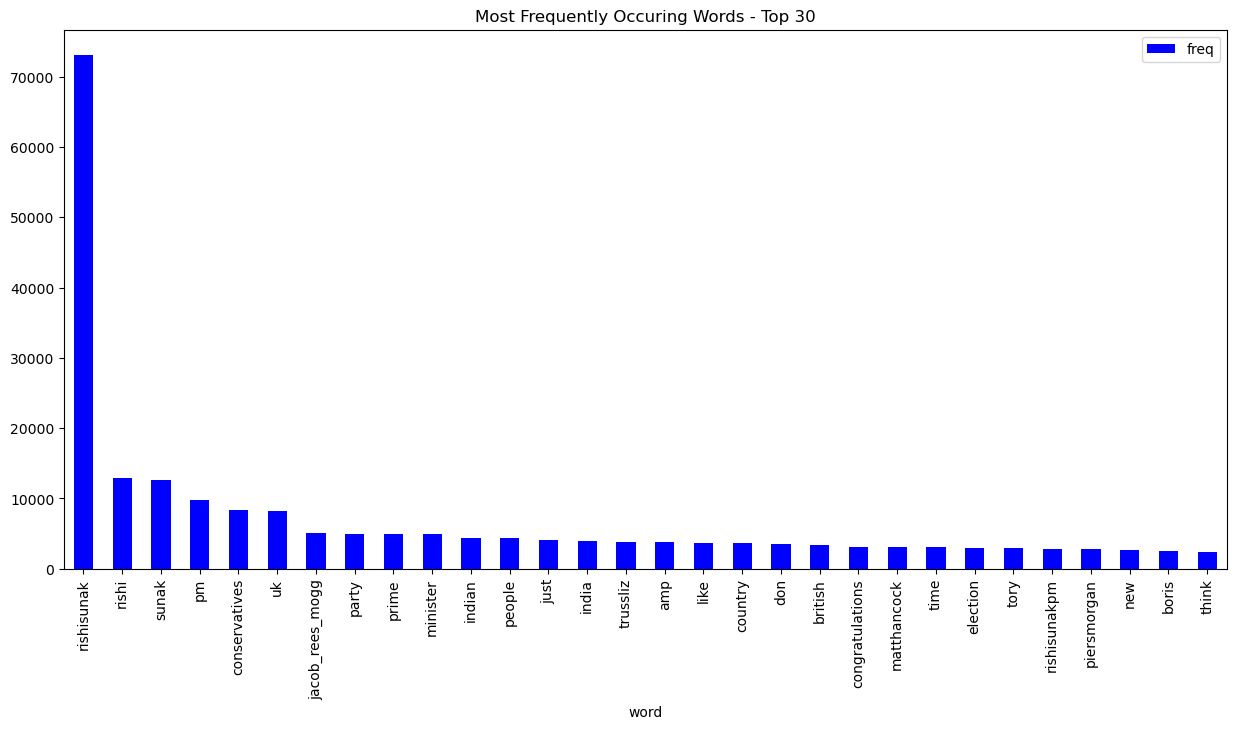

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
#FINDING AND PLOTTING THE TOP 30 MOST FREQUENTLY USED WORDS

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_set.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

<Axes: ylabel='label'>

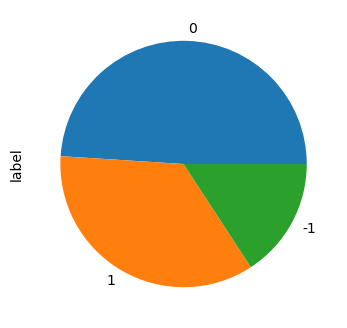

In [68]:
#VISUALIZING THE POLARITY INDEX OF DATASET

train_set['label'].value_counts().plot.pie(y = 'mass', figsize = (7, 4))

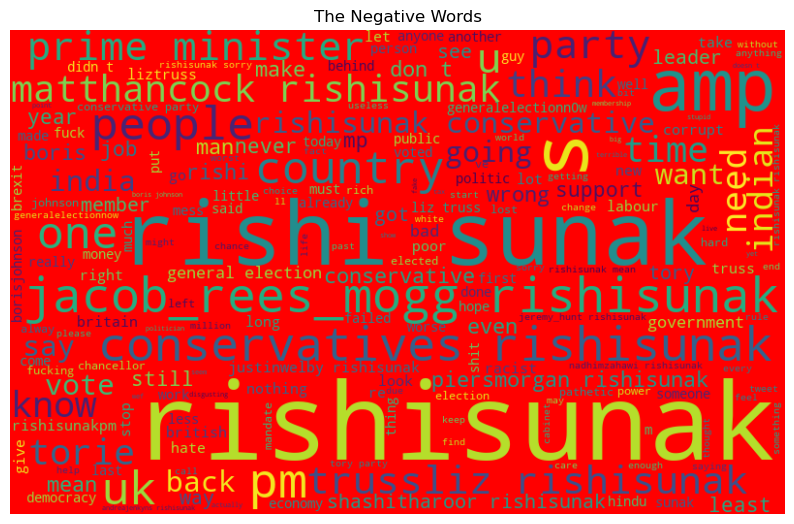

In [74]:
negative_words =' '.join([text for text in train_set['tweets'][train_set['label'] == -1]])

wordcloud = WordCloud(background_color = 'red', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

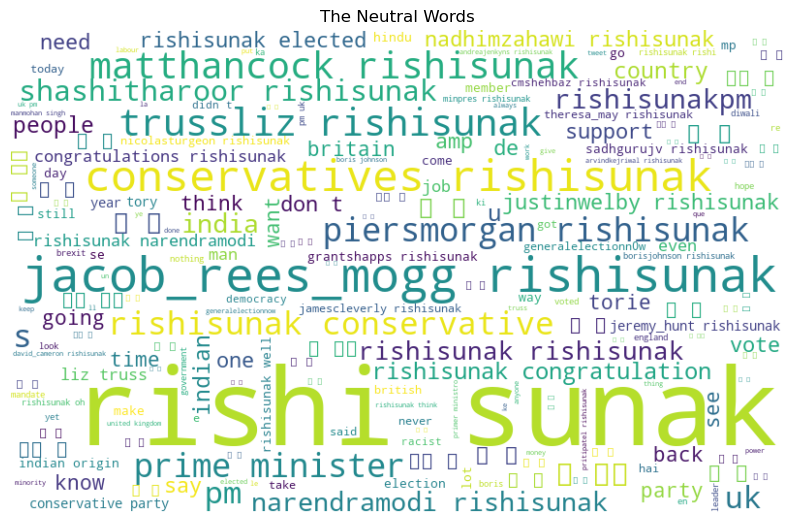

In [72]:
neutral_words =' '.join([text for text in train_set['tweets'][train_set['label'] == 0]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_64998/47678696.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_set.groupby('lengthoftweet').mean()['label'].plot.hist(color = 'blue', figsize = (6, 4),)


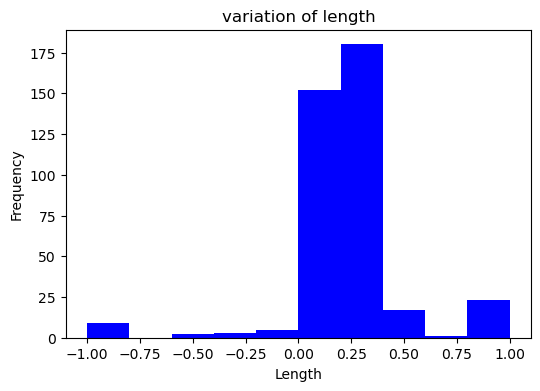

In [69]:

train_set.groupby('lengthoftweet').mean()['label'].plot.hist(color = 'blue', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

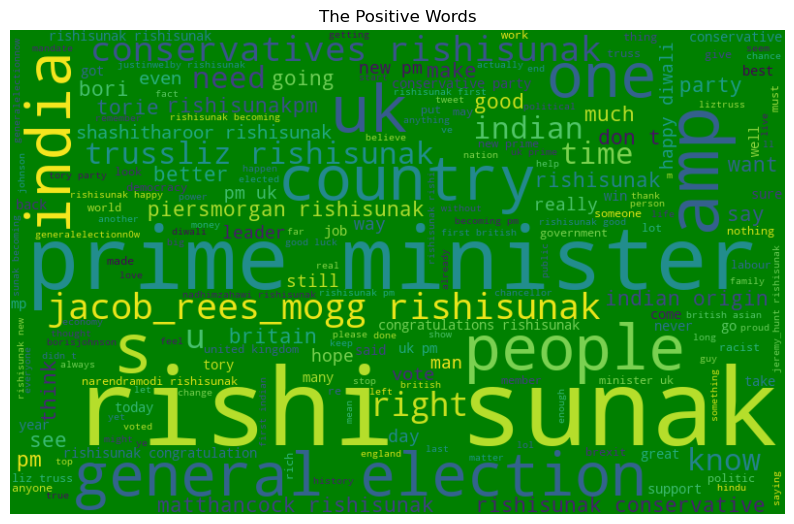

In [73]:
positive_words =' '.join([text for text in train_set['tweets'][train_set['label'] == 1]])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

Text(0.5, 1.0, 'WordCloud - Vocabulary from Tweets')

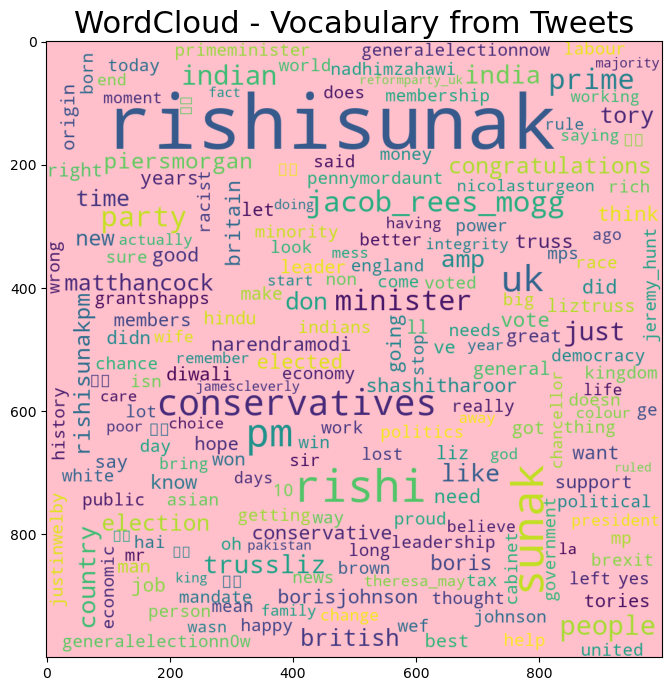

In [71]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'pink', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Tweets", fontsize = 22)